In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [2]:
data = np.loadtxt('TSPA.csv', delimiter=';').astype(np.int16)
data.shape

(200, 3)

In [3]:
def distance(xa, ya, xb, yb):
    return round(((xa-xb)**2+(ya-yb)**2)**(1/2))
distance(1,2,4,5)

4

In [4]:
def create_cost_matrix(data):
    distance_matrix = np.empty((0,len(data)), int)
    for i in range(len(data)):
        row = []
        for j in range(len(data)):
            if i != j:
                row.append(distance(data[i][0], data[i][1], data[j][0], data[j][1]))
            else:
                row.append(0)
        distance_matrix = np.append(distance_matrix, [row], axis=0)

    costs = data[:,2]
    #print(distance_matrix)
    cost_matrix = (distance_matrix + costs)
    return cost_matrix

cost_matrix = create_cost_matrix(data)
cost_matrix.shape

(200, 200)

In [5]:
def random_solution(cost_matrix, limit=100):
    random_solution_list = list(range(0,len(cost_matrix)))
    random.shuffle(random_solution_list)
    return np.array(random_solution_list)[:limit]

solution = random_solution(cost_matrix, 100)
print(solution)

[ 13  32  91  62  24  37 193 183 100 181  11 158  88  38 164 165 173 109
 159   9 114   3  99  73  71  64 171 124 102  69  58 162  76 187 107 101
 150 176  70  15 195  10  43 175 148  50  57  78  46 166 178  42  89  90
 121  23 126  56  39 168  61 135  80 108 119  28 172  96  52  85  45  86
 123 179  83  35  29  47 133 155  53   2 116  54  51   8  97 161 157  44
 153  20 177 198  27 196  87 111 186 190]


In [6]:
def calculate_objective_function(solution, cost_matrix):
    obj_func = 0
    for i in range(len(solution)-1):
        obj_func += cost_matrix[solution[i], solution[i+1]]
    obj_func += cost_matrix[solution[0], solution[-1]]
    return obj_func

calculate_objective_function(solution, cost_matrix)

276735

In [7]:
def nearest_neighbour(cost_matrix, current_id=random.randint(0, len(cost_matrix)-1), limit=100):
    all_ids = set(list(range(0,len(cost_matrix))))
    all_ids.remove(current_id)
    solution = [current_id]
    
    while len(solution) < limit:
        min_val = 99999
        min_id = -1
        for next_id in all_ids:
            if cost_matrix[current_id][next_id] < min_val:
                min_val = cost_matrix[current_id][next_id]
                min_id = next_id
        solution.append(min_id)
        all_ids.remove(min_id)
        current_id = min_id
    return np.array(solution)

solution = nearest_neighbour(cost_matrix)
print(calculate_objective_function(solution, cost_matrix))

88975


In [8]:
def greedy_cycle(cost_matrix, current_id = random.randint(0, len(cost_matrix)-1), limit=100):
    all_ids = set(list(range(0,len(cost_matrix))))
    all_ids.remove(current_id)
    solution = [current_id]
    
    for _ in range(1):
        min_val = 99999
        min_id = -1
        for next_id in all_ids:
            if cost_matrix[current_id][next_id] < min_val:
                min_val = cost_matrix[current_id][next_id]
                min_id = next_id
        solution.append(min_id)
        all_ids.remove(min_id)
        current_id = min_id
    
    while len(solution) < limit:
        min_delta = 99999
        min_id = -1
        insert_id = -1
        for i in range(len(solution)-1):
            for next_id in all_ids:
                delta = cost_matrix[solution[i]][next_id] + cost_matrix[next_id][solution[i+1]] - cost_matrix[solution[i]][solution[i+1]]
                if delta < min_delta:
                    min_delta = delta
                    min_id = next_id
                    insert_id = i
        for next_id in all_ids:
            delta = cost_matrix[solution[-1]][next_id] + cost_matrix[next_id][solution[0]] - cost_matrix[solution[-1]][solution[0]]
            if delta < min_delta:
                min_delta = delta
                min_id = next_id
                insert_id = i
        solution.insert(insert_id, min_id)
        all_ids.remove(min_id)

    return np.array(solution)
        

solution = greedy_cycle(cost_matrix)
print(calculate_objective_function(solution, cost_matrix))

115467


In [9]:
def test_solver(solver, cost_matrix, n):
    min_obj_func_value = 9999999
    max_obj_func_value = 0
    min_solution = []
    obj_values_list = []
    for i in range(n):
        solution = solver(cost_matrix, i)
        curr_obj_value = calculate_objective_function(solution, cost_matrix)
        obj_values_list.append(curr_obj_value)
        if curr_obj_value < min_obj_func_value:
            min_obj_func_value = curr_obj_value
            min_solution = solution
        if curr_obj_value > max_obj_func_value:
            max_obj_func_value = curr_obj_value
    mean_obj_func_val = sum(obj_values_list)/len(obj_values_list)
    return mean_obj_func_val, max_obj_func_value, min_obj_func_value, min_solution

In [10]:
def test_random_solver(cost_matrix, n):
    min_obj_func_value = 9999999
    max_obj_func_value = 0
    min_solution = []
    obj_values_list = []
    for _ in range(n):
        solution = random_solution(cost_matrix)
        curr_obj_value = calculate_objective_function(solution, cost_matrix)
        obj_values_list.append(curr_obj_value)
        if curr_obj_value < min_obj_func_value:
            min_obj_func_value = curr_obj_value
            min_solution = solution
        if curr_obj_value > max_obj_func_value:
            max_obj_func_value = curr_obj_value
    mean_obj_func_val = sum(obj_values_list)/len(obj_values_list)
    return mean_obj_func_val, max_obj_func_value, min_obj_func_value, min_solution

In [11]:
def plot(data, solution):
    data_ordered = np.array([data[i] for i in solution])

    plt.scatter(data_ordered[:,0], data_ordered[:,1], s=data_ordered[:,2]/data_ordered[:,2].max()*200)
    plt.plot(data_ordered[:,0], data_ordered[:,1], 'y-')
    plt.plot([data_ordered[0,0], data_ordered[-1,0]], [data_ordered[0,1], data_ordered[-1,1]], 'y-')
    plt.show()

RANDOM SOLUTION
AVERAGE: 264986.435
MINIMUM (BEST): 244780
MAXIMUM (WORST): 293539


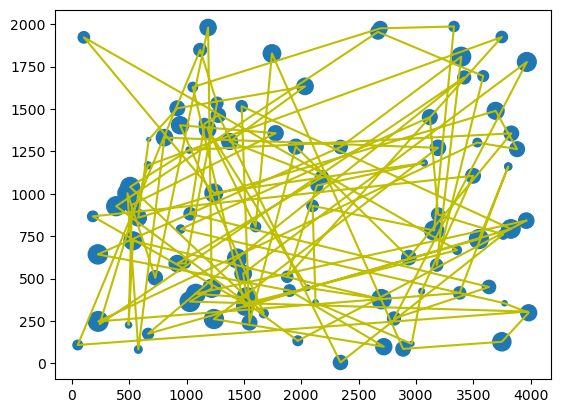

In [12]:
mean_obj_func_val, max_obj_func_value, min_obj_func_value, random_sol = test_random_solver(cost_matrix, 200)
print('RANDOM SOLUTION')
print('AVERAGE:', mean_obj_func_val)
print('MINIMUM (BEST):', min_obj_func_value)
print('MAXIMUM (WORST):', max_obj_func_value)
plot(data, random_sol)

NEAREST NEIGHBOR
AVERAGE: 87741.23
MINIMUM (BEST): 84840
MAXIMUM (WORST): 95932


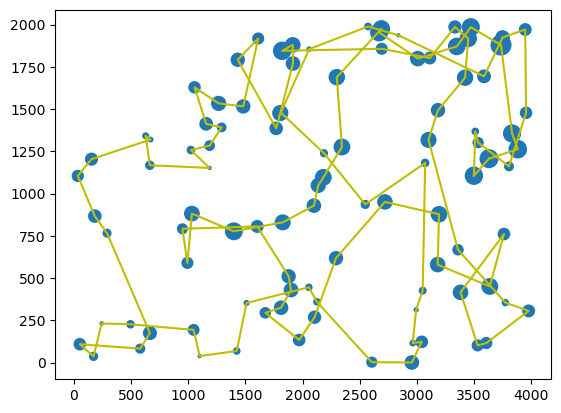

In [13]:
mean_obj_func_val, max_obj_func_value, min_obj_func_value, nearest_sol = test_solver(nearest_neighbour, cost_matrix, 200)
print('NEAREST NEIGHBOR')
print('AVERAGE:', mean_obj_func_val)
print('MINIMUM (BEST):', min_obj_func_value)
print('MAXIMUM (WORST):', max_obj_func_value)
plot(data, nearest_sol)

GREEDY CYCLE
AVERAGE: 121599.93
MINIMUM (BEST): 107857
MAXIMUM (WORST): 139172


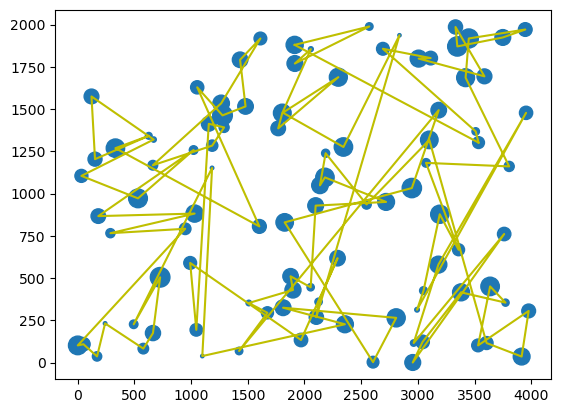

In [14]:
mean_obj_func_val, max_obj_func_value, min_obj_func_value, greedy_sol = test_solver(greedy_cycle, cost_matrix, 200)
print('GREEDY CYCLE')
print('AVERAGE:', mean_obj_func_val)
print('MINIMUM (BEST):', min_obj_func_value)
print('MAXIMUM (WORST):', max_obj_func_value)
plot(data, greedy_sol)

In [15]:
data = np.loadtxt('TSPB.csv', delimiter=';').astype(np.int16)
cost_matrix = create_cost_matrix(data)
cost_matrix.shape

(200, 200)

RANDOM SOLUTION
AVERAGE: 266317.525
MINIMUM (BEST): 240324
MAXIMUM (WORST): 292494


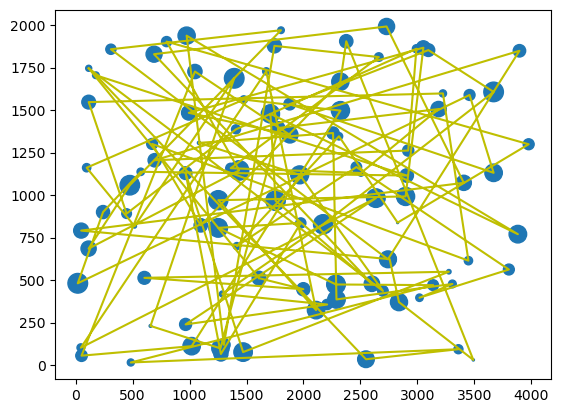

In [16]:
mean_obj_func_val, max_obj_func_value, min_obj_func_value, random_sol = test_random_solver(cost_matrix, 200)
print('RANDOM SOLUTION')
print('AVERAGE:', mean_obj_func_val)
print('MINIMUM (BEST):', min_obj_func_value)
print('MAXIMUM (WORST):', max_obj_func_value)
plot(data, random_sol)

NEAREST NEIGHBOR
AVERAGE: 79096.295
MINIMUM (BEST): 77417
MAXIMUM (WORST): 81600


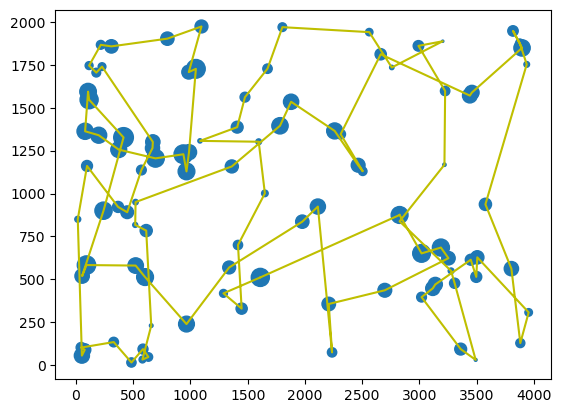

In [17]:
mean_obj_func_val, max_obj_func_value, min_obj_func_value, nearest_sol = test_solver(nearest_neighbour, cost_matrix, 200)
print('NEAREST NEIGHBOR')
print('AVERAGE:', mean_obj_func_val)
print('MINIMUM (BEST):', min_obj_func_value)
print('MAXIMUM (WORST):', max_obj_func_value)
plot(data, nearest_sol)

GREEDY CYCLE
AVERAGE: 113789.4
MINIMUM (BEST): 97926
MAXIMUM (WORST): 143171


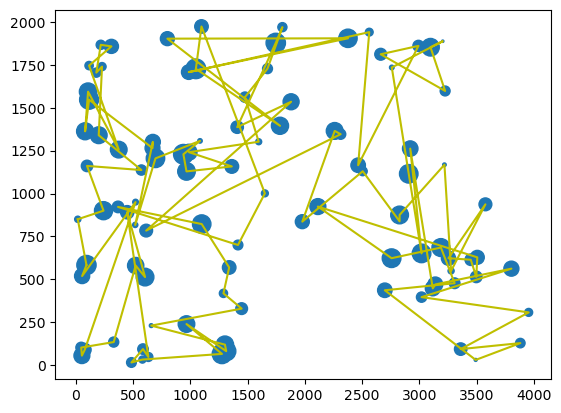

In [18]:
mean_obj_func_val, max_obj_func_value, min_obj_func_value, greedy_sol = test_solver(greedy_cycle, cost_matrix, 200)
print('GREEDY CYCLE')
print('AVERAGE:', mean_obj_func_val)
print('MINIMUM (BEST):', min_obj_func_value)
print('MAXIMUM (WORST):', max_obj_func_value)
plot(data, greedy_sol)